In [13]:
import matplotlib.pyplot as plt
import numpy as np
import txsim

In [14]:
F_C = 2.412e9
T_S = 1e-6
S = 11
M = 4
SCHEME = "dpsk"
SNR = 10
PHASE_OFFSET = 0  #np.pi/4
A = 0.3
PULSE = txsim.rect  # lambda t, t_s: txsim.sqrt_raised_cosine(t, A, t_s)

In [15]:
sim = txsim.Simulation(f_s=20e9)
mapping = sim.create_mapping(M, SCHEME)
ch = sim.create_channel(t_s=T_S, snr=SNR, h=np.array([1]), noisy=True)
eq = sim.create_equalizer("mmse", ch, 5)
tx = sim.create_transmitter(f_c=F_C, t_s=T_S, spreading_factor=S, mapping=mapping, delay_quadrature=False, pulse=PULSE)
tx2 = sim.create_transmitter(f_c=F_C + 5e6, t_s=T_S, spreading_factor=S, mapping=mapping, delay_quadrature=False, pulse=PULSE)
rx = sim.create_receiver(f_c=F_C, t_s=T_S, spreading_factor=S, equalizer=eq, mapping=mapping, phase_offset=PHASE_OFFSET, delay_quadrature=False, pulse=PULSE)
scope = sim.create_scope(figsize=(10, 5))

In [16]:
#scope.attach(tx, "symbols", "xy", title="Signal Constellation", reference=mapping.constellation, figsize=(5, 5))
#scope.attach(tx, "transmitted_symbols", "xy", title="Transmitted Constellation", reference=mapping.constellation, figsize=(5, 5))
#scope.attach(tx, "baseband", "t", title="Baseband Signal", figsize=(10, 10))
scope.attach(tx, "modulated", "t", title="Modulated Transmit Signal", imag=False)
scope.attach(rx, "received", "t", title="Received Signal", imag=False)
#scope.attach(rx, "received", "f", title="Received Signal Spectrum")
#scope.attach(rx, "demodulated", "t", title="Demodulated Signal", figsize=(10, 10))
#scope.attach(rx, "demodulated", "f", title="Demodulated Signal Spectrum")
#scope.attach(rx, "filtered", "t", title="Filtered Signal", figsize=(10, 10))
#scope.attach(rx, "filtered", "f", title="Filtered Signal Spectrum", xlim=(-2*S/T_S, 2*S/T_S))
#scope.attach(rx, "equalized", "t", title="Equalized Signal", figsize=(10, 10))
#scope.attach(rx, "pulse_filtered", "t", title="Pulse Filtered Signal", figsize=(10, 10))
#scope.attach(rx, "detected_symbols", "xy", title="Received Constellation", reference=mapping.constellation, figsize=(5, 5))
#scope.attach(rx, "symbols", "xy", title="Decoded Constellation", reference=mapping.constellation, linestyle="-", figsize=(5, 5))
#scope.attach(rx, "channel_response", "t", title="Channel Response", imag=False)
#scope.attach(rx, "channel_response", "f", title="Channel Response Spectrum", xlim=(-S/T_S, S/T_S), db=True, ymin=-30)
scope.attach(mapping, "symbols", "xy", title="Generated Constellation", figsize=(5, 5))
scope.attach(mapping, "encoded_symbols", "xy", title="Encoded Constellation", figsize=(5, 5))
scope.attach(mapping, "detected_symbols", "xy", title="Received Constellation", figsize=(5, 5))
scope.attach(mapping, "decoded_symbols", "xy", title="Decoded Constellation", figsize=(5, 5))

In [17]:
# signal = tx.transmit_pilot(20)
# received = ch.transmit(signal)
# rx.estimate_channel(received, ch)

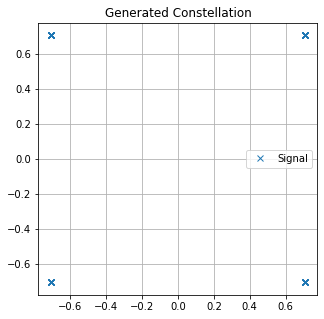

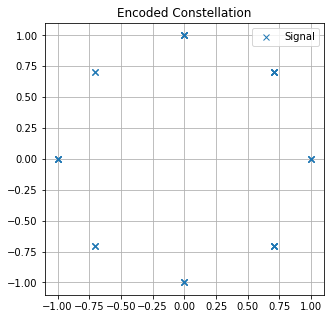

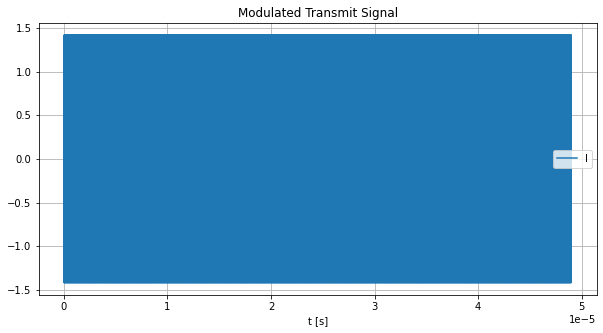

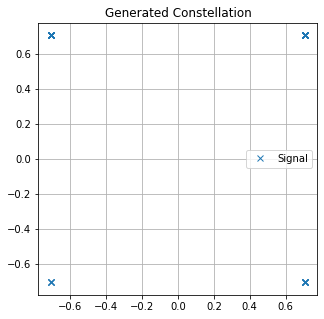

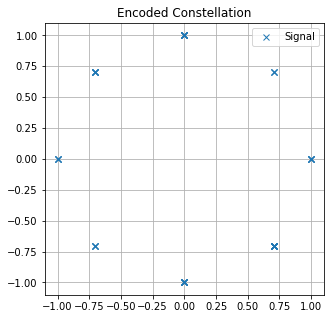

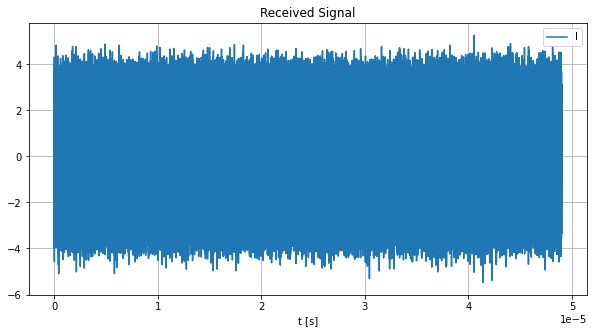

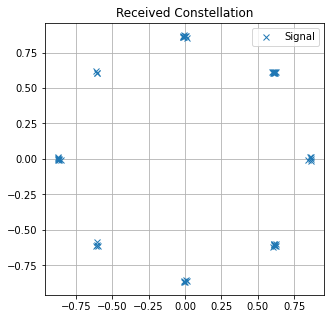

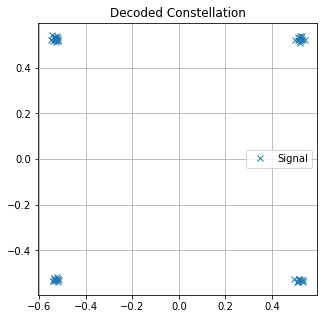

'Hello world!'

In [18]:
signal = tx.transmit_data("Hello world!".encode("utf-8"))
signal2 = tx2.transmit_data("ABCDEFGGHIJK".encode("utf-8"))
received = ch.transmit(signal)  + ch.transmit(signal2)
rx.receive_data(received).decode("utf-8")